# Lab Case Study
_______________________________________________________________________________________________________________________________


## Scenario
____
 


You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Business Objectives
_____________________________________

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Activities
___
### Part 1
- [ ] Aggregate data into one Data Frame using Pandas.
- [ ] Standardizing header names
- [ ] Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- [ ] Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints)
- [ ] Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- [ ] Removing duplicates
- [ ] Replacing null values – Replace missing values with means of the column (for numerical columns)

### Part 2
- [ ] Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- [ ] Standardizing the data – Use string functions to standardize the text data (lower case)
    
### Part 3
- [ ] Which columns are numerical?
- [ ] Which columns are categorical?
- [ ] Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

___

###  <font face="Verdana">Importing relevant libraries / modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### <font face="Verdana">Importing and merging files

In [2]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')

In [3]:
file1

Customer          ST GENDER             Education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
4003      NaN         NaN    NaN                   NaN   
4004      NaN         NaN    NaN                   NaN   
4005      NaN         NaN    NaN                   NaN   
4006      NaN         NaN    NaN                   NaN   
4007      NaN         NaN    NaN                   NaN   

     Customer Lifetime Value   Income  Monthly Premium Auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 764586.18%      0.0                 106.0   
4                 536307.65%  36357.0                  68.0   
...                      ...      ...                   ...   
4003                     NaN      NaN                   NaN   
4004                     NaN      NaN                   NaN   
4005                     NaN      NaN                   NaN   
4006                     NaN      NaN                   NaN   
4007                     NaN      NaN                   NaN   

     Number of Open Complaints     Policy Type  Vehicle Class  \
0                       1/0/00   Personal Auto  Four-Door Car   
1                       1/0/00   Personal Auto  Four-Door Car   
2                       1/0/00   Personal Auto   Two-Door Car   
3                       1/0/00  Corporate Auto            SUV   
4                       1/0/00   Personal Auto  Four-Door Car   
...                        ...             ...            ...   
4003                       NaN             NaN            NaN   
4004                       NaN             NaN            NaN   
4005                       NaN             NaN            NaN   
4006                       NaN             NaN            NaN   
4007                       NaN             NaN            NaN   

      Total Claim Amount  
0               2.704934  
1            1131.464935  
2             566.472247  
3             529.881344  
4              17.269323  
...                  ...  
4003                 NaN  
4004                 NaN  
4005                 NaN  
4006                 NaN  
4007                 NaN  

[4008 rows x 11 columns]

In [4]:
file2

Customer          ST GENDER Education Customer Lifetime Value  Income  \
0    GS98873     Arizona      F  Bachelor              323912.47%   16061   
1    CW49887  California      F    Master              462680.11%   79487   
2    MY31220  California      F   College              899704.02%   54230   
3    UH35128      Oregon      F   College             2580706.30%   71210   
4    WH52799     Arizona      F   College              380812.21%   94903   
..       ...         ...    ...       ...                     ...     ...   
991  HV85198     Arizona      M    Master              847141.75%   63513   
992  BS91566     Arizona      F   College              543121.91%   58161   
993  IL40123      Nevada      F   College              568964.41%   83640   
994  MY32149  California      F    Master              368672.38%       0   
995  SA91515  California      M  Bachelor              399258.39%       0   

     Monthly Premium Auto Number of Open Complaints  Total Claim Amount  \
0                      88                    1/0/00          633.600000   
1                     114                    1/0/00          547.200000   
2                     112                    1/0/00          537.600000   
3                     214                    1/1/00         1027.200000   
4                      94                    1/0/00          451.200000   
..                    ...                       ...                 ...   
991                    70                    1/0/00          185.667213   
992                    68                    1/0/00          140.747286   
993                    70                    1/0/00          471.050488   
994                    96                    1/0/00           28.460568   
995                   111                    1/0/00          700.349052   

        Policy Type  Vehicle Class  
0     Personal Auto  Four-Door Car  
1      Special Auto            SUV  
2     Personal Auto   Two-Door Car  
3     Personal Auto     Luxury Car  
4    Corporate Auto   Two-Door Car  
..              ...            ...  
991   Personal Auto  Four-Door Car  
992  Corporate Auto  Four-Door Car  
993  Corporate Auto   Two-Door Car  
994   Personal Auto   Two-Door Car  
995   Personal Auto            SUV  

[996 rows x 11 columns]

In [5]:
file3

Customer       State  Customer Lifetime Value             Education  \
0     SA25987  Washington              3479.137523  High School or Below   
1     TB86706     Arizona              2502.637401                Master   
2     ZL73902      Nevada              3265.156348              Bachelor   
3     KX23516  California              4455.843406  High School or Below   
4     FN77294  California              7704.958480  High School or Below   
...       ...         ...                      ...                   ...   
7065  LA72316  California             23405.987980              Bachelor   
7066  PK87824  California              3096.511217               College   
7067  TD14365  California              8163.890428              Bachelor   
7068  UP19263  California              7524.442436               College   
7069  Y167826  California              2611.836866               College   

     Gender  Income  Monthly Premium Auto  Number of Open Complaints  \
0         M       0                   104                          0   
1         M       0                    66                          0   
2         F   25820                    82                          0   
3         F       0                   121                          0   
4         M   30366                   101                          2   
...     ...     ...                   ...                        ...   
7065      M   71941                    73                          0   
7066      F   21604                    79                          0   
7067      M       0                    85                          3   
7068      M   21941                    96                          0   
7069      M       0                    77                          0   

         Policy Type  Total Claim Amount  Vehicle Class  
0      Personal Auto          499.200000   Two-Door Car  
1      Personal Auto            3.468912   Two-Door Car  
2      Personal Auto          393.600000  Four-Door Car  
3      Personal Auto          699.615192            SUV  
4      Personal Auto          484.800000            SUV  
...              ...                 ...            ...  
7065   Personal Auto          198.234764  Four-Door Car  
7066  Corporate Auto          379.200000  Four-Door Car  
7067  Corporate Auto          790.784983  Four-Door Car  
7068   Personal Auto          691.200000  Four-Door Car  
7069  Corporate Auto          369.600000   Two-Door Car  

[7070 rows x 11 columns]

**Some observations about the files:**

1. It seems like <font color='brown'><b>'file1'</b></font> has a lot of rows with only `NaN` values. We can get rid of them.
2. <font color='brown'><b>'file3'</b></font> has different column names compared to the other files, what would cause trouble when concatenating.

In [6]:
#1. delete rows only if ALL values are missing
file1.dropna(axis=0, how='all', inplace=True)
file1.shape

(1071, 11)

<font color='brown'><b>file1</b></font> had almost 3000 rows deleted, but there were no changes in the other files

```python
>>> file2.dropna(axis=0, how='all', inplace=True)
>>> file2.shape
(996, 11)

>>> file2.dropna(axis=0, how='all', inplace=True)
>>> file2.shape
(7070, 11)
```


In [7]:
#2. rename columns in file3 to match the ones in the other files
file3.rename(columns={'State': 'ST', 'Gender': 'GENDER'}, inplace=True)
file3.columns

Index(['Customer', 'ST', 'Customer Lifetime Value', 'Education', 'GENDER',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Total Claim Amount', 'Vehicle Class'],
      dtype='object')

<font face="Verdana">Now we can finally join all files and start working on them:

In [8]:
customer_data = pd.concat([file1, file2, file3]).reset_index(drop=True)
customer_data

Customer          ST GENDER             Education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
9132  LA72316  California      M              Bachelor   
9133  PK87824  California      F               College   
9134  TD14365  California      M              Bachelor   
9135  UP19263  California      M               College   
9136  Y167826  California      M               College   

     Customer Lifetime Value   Income  Monthly Premium Auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 764586.18%      0.0                 106.0   
4                 536307.65%  36357.0                  68.0   
...                      ...      ...                   ...   
9132             23405.98798  71941.0                  73.0   
9133             3096.511217  21604.0                  79.0   
9134             8163.890428      0.0                  85.0   
9135             7524.442436  21941.0                  96.0   
9136             2611.836866      0.0                  77.0   

     Number of Open Complaints     Policy Type  Vehicle Class  \
0                       1/0/00   Personal Auto  Four-Door Car   
1                       1/0/00   Personal Auto  Four-Door Car   
2                       1/0/00   Personal Auto   Two-Door Car   
3                       1/0/00  Corporate Auto            SUV   
4                       1/0/00   Personal Auto  Four-Door Car   
...                        ...             ...            ...   
9132                         0   Personal Auto  Four-Door Car   
9133                         0  Corporate Auto  Four-Door Car   
9134                         3  Corporate Auto  Four-Door Car   
9135                         0   Personal Auto  Four-Door Car   
9136                         0  Corporate Auto   Two-Door Car   

      Total Claim Amount  
0               2.704934  
1            1131.464935  
2             566.472247  
3             529.881344  
4              17.269323  
...                  ...  
9132          198.234764  
9133          379.200000  
9134          790.784983  
9135          691.200000  
9136          369.600000  

[9137 rows x 11 columns]

<font face="Verdana">Let's investigate the data a bit further.

In [9]:
customer_data.nunique()

Customer                     9056
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      8211
Income                       5655
Monthly Premium Auto          209
Number of Open Complaints      12
Policy Type                     3
Vehicle Class                   6
Total Claim Amount           5070
dtype: int64

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   9137 non-null   object 
 1   ST                         9137 non-null   object 
 2   GENDER                     9015 non-null   object 
 3   Education                  9137 non-null   object 
 4   Customer Lifetime Value    9130 non-null   object 
 5   Income                     9137 non-null   float64
 6   Monthly Premium Auto       9137 non-null   float64
 7   Number of Open Complaints  9137 non-null   object 
 8   Policy Type                9137 non-null   object 
 9   Vehicle Class              9137 non-null   object 
 10  Total Claim Amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 785.3+ KB


<font face="Verdana">**More observations about the data**

- <font face="Verdana">Header names have different naming conventions
- <font face="Verdana">For analysis purposes, the <font color='darkgreen'>Customer</font> column doesn't add any useful information
- <font face="Verdana"><font color='darkgreen'>GENDER</font> has more unique values than expected
- <font face="Verdana">The columns <font color='darkgreen'>Customer Lifetime Value</font> and <font color='darkgreen'>Number of Open Complaints</font> have inconsistent values and 'object' as data type, when they were suposed to be 'numeric'
- <font face="Verdana">Only two columns have missing values: <font color='darkgreen'>GENDER</font> and <font color='darkgreen'>Customer Lifetime Value</font>

### <font face="Verdana">Standardizing header names

In [11]:
# change the columns to lower case and snake case (with an underscore)
customer_data.columns = customer_data.columns.str.lower().str.replace(' ', '_')

# change the column 'st' to a more intuitive name
customer_data.rename(columns={'st': 'state'}, inplace=True)

customer_data

customer       state gender             education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
9132  LA72316  California      M              Bachelor   
9133  PK87824  California      F               College   
9134  TD14365  California      M              Bachelor   
9135  UP19263  California      M               College   
9136  Y167826  California      M               College   

     customer_lifetime_value   income  monthly_premium_auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 764586.18%      0.0                 106.0   
4                 536307.65%  36357.0                  68.0   
...                      ...      ...                   ...   
9132             23405.98798  71941.0                  73.0   
9133             3096.511217  21604.0                  79.0   
9134             8163.890428      0.0                  85.0   
9135             7524.442436  21941.0                  96.0   
9136             2611.836866      0.0                  77.0   

     number_of_open_complaints     policy_type  vehicle_class  \
0                       1/0/00   Personal Auto  Four-Door Car   
1                       1/0/00   Personal Auto  Four-Door Car   
2                       1/0/00   Personal Auto   Two-Door Car   
3                       1/0/00  Corporate Auto            SUV   
4                       1/0/00   Personal Auto  Four-Door Car   
...                        ...             ...            ...   
9132                         0   Personal Auto  Four-Door Car   
9133                         0  Corporate Auto  Four-Door Car   
9134                         3  Corporate Auto  Four-Door Car   
9135                         0   Personal Auto  Four-Door Car   
9136                         0  Corporate Auto   Two-Door Car   

      total_claim_amount  
0               2.704934  
1            1131.464935  
2             566.472247  
3             529.881344  
4              17.269323  
...                  ...  
9132          198.234764  
9133          379.200000  
9134          790.784983  
9135          691.200000  
9136          369.600000  

[9137 rows x 11 columns]

### <font face="Verdana">Deleting unecessary columns

In [12]:
customer_data.drop('customer', axis=1, inplace=True)

In [13]:
customer_data

state gender             education customer_lifetime_value  \
0     Washington    NaN                Master                     NaN   
1        Arizona      F              Bachelor              697953.59%   
2         Nevada      F              Bachelor             1288743.17%   
3     California      M              Bachelor              764586.18%   
4     Washington      M  High School or Below              536307.65%   
...          ...    ...                   ...                     ...   
9132  California      M              Bachelor             23405.98798   
9133  California      F               College             3096.511217   
9134  California      M              Bachelor             8163.890428   
9135  California      M               College             7524.442436   
9136  California      M               College             2611.836866   

       income  monthly_premium_auto number_of_open_complaints     policy_type  \
0         0.0                1000.0                    1/0/00   Personal Auto   
1         0.0                  94.0                    1/0/00   Personal Auto   
2     48767.0                 108.0                    1/0/00   Personal Auto   
3         0.0                 106.0                    1/0/00  Corporate Auto   
4     36357.0                  68.0                    1/0/00   Personal Auto   
...       ...                   ...                       ...             ...   
9132  71941.0                  73.0                         0   Personal Auto   
9133  21604.0                  79.0                         0  Corporate Auto   
9134      0.0                  85.0                         3  Corporate Auto   
9135  21941.0                  96.0                         0   Personal Auto   
9136      0.0                  77.0                         0  Corporate Auto   

      vehicle_class  total_claim_amount  
0     Four-Door Car            2.704934  
1     Four-Door Car         1131.464935  
2      Two-Door Car          566.472247  
3               SUV          529.881344  
4     Four-Door Car           17.269323  
...             ...                 ...  
9132  Four-Door Car          198.234764  
9133  Four-Door Car          379.200000  
9134  Four-Door Car          790.784983  
9135  Four-Door Car          691.200000  
9136   Two-Door Car          369.600000  

[9137 rows x 10 columns]

### <font face="Verdana">Filtering data and correcting typos

<font face="Verdana"><font color='darkgreen'>**state**

In [14]:
# check the values in the 'state' column
customer_data['state'].value_counts(dropna=False)

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

<font face="Verdana">One thing to notice is that the column doesn't have missing values. Also, there are incompatible names for some states, so let's correct them.

In [15]:
customer_data['state'].replace({'Cali': 'California', 'AZ': 'Arizona', 'WA': 'Washington'}, inplace=True)
customer_data['state'].value_counts()

California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

<font face="Verdana"><font color='darkgreen'>**gender**

In [16]:
# check the values in the 'gender' column
customer_data['gender'].value_counts(dropna=False)

F         4560
M         4368
NaN        122
Male        40
female      30
Femal       17
Name: gender, dtype: int64

<font face="Verdana">There are some inconsistency and typos in the the values that we need to correct.

In [17]:
customer_data['gender'].replace({'Male': 'M', 'Femal': 'F', 'female': 'F'}, inplace=True)
customer_data['gender'].value_counts(dropna=False)

F      4607
M      4408
NaN     122
Name: gender, dtype: int64

<font face="Verdana"><font color='darkgreen'>**education**

In [18]:
customer_data['education'].value_counts()

Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [19]:
# Just a small issue regarding 'Bachelor/s'
customer_data['education'].replace('Bachelors', 'Bachelor', inplace=True)
customer_data['education'].value_counts(dropna=False)

Bachelor                2743
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Name: education, dtype: int64

<font face="Verdana">The other columns didn't have any odd values

```python
>>> customer_data['policy_type'].value_counts()
Personal Auto     6792
Corporate Auto    1965
Special Auto       380
Name: policy_type, dtype: int64
        
>>> customer_data['vehicle_class'].value_counts()
Four-Door Car    4641
Two-Door Car     1896
SUV              1774
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: vehicle_class, dtype: int64
```

### <font face="Verdana">Correcting data types

<font face="Verdana"><font color='darkgreen'>**customer_lifetime_value**

In [20]:
# check if string has anything that is not a number
customer_data['customer_lifetime_value'].str.contains('(?!^\d+$)^.+$').sum()

2060

In [21]:
customer_data['customer_lifetime_value'].str.contains('%').sum()

2060

<font face="Verdana">It seems like the only character that is not a number is the '%'. So let's replace it and convert the values.

In [22]:
remove_pct = lambda x: x.replace('%', '') if type(x) == str else x
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].apply(remove_pct)

In [23]:
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].astype(float)
customer_data['customer_lifetime_value']

0                NaN
1       6.979536e+05
2       1.288743e+06
3       7.645862e+05
4       5.363077e+05
            ...     
9132    2.340599e+04
9133    3.096511e+03
9134    8.163890e+03
9135    7.524442e+03
9136    2.611837e+03
Name: customer_lifetime_value, Length: 9137, dtype: float64

<font face="Verdana"><font color='darkgreen'>**number_of_open_complaints**

In [24]:
customer_data['number_of_open_complaints'].value_counts()

0         5629
1/0/00    1626
1          765
2          283
1/1/00     247
3          230
4          119
1/2/00      93
1/3/00      60
5           44
1/4/00      29
1/5/00      12
Name: number_of_open_complaints, dtype: int64

<font face="Verdana">From the values in the form '1/<ins>0-5</ins>/00', we should get the middle number. One possible approach:

```python
>>> '1/1/00'.split('/')
['1', '1', '00']
  0    1     2  indices
       ^
```

In [25]:
get_middle_number = lambda x: x.split('/')[1] if type(x) == str else x
# We only want to modify the values stored as strings. By splitting them, we should get the numbers stored as a list
# and we are interested in the second element (index 1)

customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'].apply(get_middle_number).astype(int)
customer_data['number_of_open_complaints'].value_counts()

0    7255
1    1012
2     376
3     290
4     148
5      56
Name: number_of_open_complaints, dtype: int64

<font face="Verdana">Check if we have the right types:

In [26]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   int32  
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(4), int32(1), object(5)
memory usage: 678.3+ KB


### <font face="Verdana">Removing duplicates

In [27]:
customer_data.drop_duplicates(inplace=True)
customer_data

state gender             education  customer_lifetime_value  \
0     Washington    NaN                Master                      NaN   
1        Arizona      F              Bachelor             6.979536e+05   
2         Nevada      F              Bachelor             1.288743e+06   
3     California      M              Bachelor             7.645862e+05   
4     Washington      M  High School or Below             5.363077e+05   
...          ...    ...                   ...                      ...   
9132  California      M              Bachelor             2.340599e+04   
9133  California      F               College             3.096511e+03   
9134  California      M              Bachelor             8.163890e+03   
9135  California      M               College             7.524442e+03   
9136  California      M               College             2.611837e+03   

       income  monthly_premium_auto  number_of_open_complaints  \
0         0.0                1000.0                          0   
1         0.0                  94.0                          0   
2     48767.0                 108.0                          0   
3         0.0                 106.0                          0   
4     36357.0                  68.0                          0   
...       ...                   ...                        ...   
9132  71941.0                  73.0                          0   
9133  21604.0                  79.0                          0   
9134      0.0                  85.0                          3   
9135  21941.0                  96.0                          0   
9136      0.0                  77.0                          0   

         policy_type  vehicle_class  total_claim_amount  
0      Personal Auto  Four-Door Car            2.704934  
1      Personal Auto  Four-Door Car         1131.464935  
2      Personal Auto   Two-Door Car          566.472247  
3     Corporate Auto            SUV          529.881344  
4      Personal Auto  Four-Door Car           17.269323  
...              ...            ...                 ...  
9132   Personal Auto  Four-Door Car          198.234764  
9133  Corporate Auto  Four-Door Car          379.200000  
9134  Corporate Auto  Four-Door Car          790.784983  
9135   Personal Auto  Four-Door Car          691.200000  
9136  Corporate Auto   Two-Door Car          369.600000  

[8875 rows x 10 columns]

### <font face="Verdana">Replacing null values

<font face="Verdana">The only numeric column with missing values is <font color='darkgreen'>customer_lifetime_value</font>. We're gonna replace those with the mean.

In [28]:
customer_data['customer_lifetime_value'].fillna(customer_data['customer_lifetime_value'].mean(), inplace=True)
customer_data['customer_lifetime_value'].isna().sum()

0

<font face="Verdana">For the <font color='darkgreen'>gender</font> column, let's adopt 'unknown' for the missing values

In [29]:
customer_data['gender'].fillna('Unknown', inplace=True)
customer_data['customer_lifetime_value'].isna().sum()

0

In [30]:
customer_data.reset_index(drop=True, inplace=True)
customer_data

state   gender             education  customer_lifetime_value  \
0     Washington  Unknown                Master             1.855902e+05   
1        Arizona        F              Bachelor             6.979536e+05   
2         Nevada        F              Bachelor             1.288743e+06   
3     California        M              Bachelor             7.645862e+05   
4     Washington        M  High School or Below             5.363077e+05   
...          ...      ...                   ...                      ...   
8870  California        M              Bachelor             2.340599e+04   
8871  California        F               College             3.096511e+03   
8872  California        M              Bachelor             8.163890e+03   
8873  California        M               College             7.524442e+03   
8874  California        M               College             2.611837e+03   

       income  monthly_premium_auto  number_of_open_complaints  \
0         0.0                1000.0                          0   
1         0.0                  94.0                          0   
2     48767.0                 108.0                          0   
3         0.0                 106.0                          0   
4     36357.0                  68.0                          0   
...       ...                   ...                        ...   
8870  71941.0                  73.0                          0   
8871  21604.0                  79.0                          0   
8872      0.0                  85.0                          3   
8873  21941.0                  96.0                          0   
8874      0.0                  77.0                          0   

         policy_type  vehicle_class  total_claim_amount  
0      Personal Auto  Four-Door Car            2.704934  
1      Personal Auto  Four-Door Car         1131.464935  
2      Personal Auto   Two-Door Car          566.472247  
3     Corporate Auto            SUV          529.881344  
4      Personal Auto  Four-Door Car           17.269323  
...              ...            ...                 ...  
8870   Personal Auto  Four-Door Car          198.234764  
8871  Corporate Auto  Four-Door Car          379.200000  
8872  Corporate Auto  Four-Door Car          790.784983  
8873   Personal Auto  Four-Door Car          691.200000  
8874  Corporate Auto   Two-Door Car          369.600000  

[8875 rows x 10 columns]

### <font face="Verdana">Bucketing the data

<font face="Verdana">Replace column <font color='darkgreen'>state</font> to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central.

In [31]:
customer_data['zones'] = customer_data['state'].replace({
    'California': 'West Region',
    'Oregon': 'North West',
    'Washington': 'East',
    'Arizona': 'Central',
    'Nevada': 'Central'
})
customer_data

state   gender             education  customer_lifetime_value  \
0     Washington  Unknown                Master             1.855902e+05   
1        Arizona        F              Bachelor             6.979536e+05   
2         Nevada        F              Bachelor             1.288743e+06   
3     California        M              Bachelor             7.645862e+05   
4     Washington        M  High School or Below             5.363077e+05   
...          ...      ...                   ...                      ...   
8870  California        M              Bachelor             2.340599e+04   
8871  California        F               College             3.096511e+03   
8872  California        M              Bachelor             8.163890e+03   
8873  California        M               College             7.524442e+03   
8874  California        M               College             2.611837e+03   

       income  monthly_premium_auto  number_of_open_complaints  \
0         0.0                1000.0                          0   
1         0.0                  94.0                          0   
2     48767.0                 108.0                          0   
3         0.0                 106.0                          0   
4     36357.0                  68.0                          0   
...       ...                   ...                        ...   
8870  71941.0                  73.0                          0   
8871  21604.0                  79.0                          0   
8872      0.0                  85.0                          3   
8873  21941.0                  96.0                          0   
8874      0.0                  77.0                          0   

         policy_type  vehicle_class  total_claim_amount        zones  
0      Personal Auto  Four-Door Car            2.704934         East  
1      Personal Auto  Four-Door Car         1131.464935      Central  
2      Personal Auto   Two-Door Car          566.472247      Central  
3     Corporate Auto            SUV          529.881344  West Region  
4      Personal Auto  Four-Door Car           17.269323         East  
...              ...            ...                 ...          ...  
8870   Personal Auto  Four-Door Car          198.234764  West Region  
8871  Corporate Auto  Four-Door Car          379.200000  West Region  
8872  Corporate Auto  Four-Door Car          790.784983  West Region  
8873   Personal Auto  Four-Door Car          691.200000  West Region  
8874  Corporate Auto   Two-Door Car          369.600000  West Region  

[8875 rows x 11 columns]

### <font face="Verdana">Categorical and numerical columns

In [32]:
categorical_columns = customer_data.columns[customer_data.dtypes == 'object'].to_list()
categorical_columns

['state', 'gender', 'education', 'policy_type', 'vehicle_class', 'zones']

In [33]:
numerical_columns = customer_data.columns[customer_data.dtypes != 'object'].to_list()
numerical_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'total_claim_amount']

### <font face="Verdana">Standardizing the data

<font face="Verdana">Change all text data to lower case

In [34]:
customer_data[categorical_columns] = customer_data[categorical_columns].applymap(str.lower)
customer_data[categorical_columns]

state   gender             education     policy_type  \
0     washington  unknown                master   personal auto   
1        arizona        f              bachelor   personal auto   
2         nevada        f              bachelor   personal auto   
3     california        m              bachelor  corporate auto   
4     washington        m  high school or below   personal auto   
...          ...      ...                   ...             ...   
8870  california        m              bachelor   personal auto   
8871  california        f               college  corporate auto   
8872  california        m              bachelor  corporate auto   
8873  california        m               college   personal auto   
8874  california        m               college  corporate auto   

      vehicle_class        zones  
0     four-door car         east  
1     four-door car      central  
2      two-door car      central  
3               suv  west region  
4     four-door car         east  
...             ...          ...  
8870  four-door car  west region  
8871  four-door car  west region  
8872  four-door car  west region  
8873  four-door car  west region  
8874   two-door car  west region  

[8875 rows x 6 columns]

<b>
______________________________________________________________________________________________________________________________

<font face="Verdana">**We have a new dataset to work with!**

## Activities
___

**We have a new dataset to work with!**
    
### Part 4
- [ ] Show a plot of the total number of responses.
- [ ] Show a plot of the response rate by the sales channel.
- [ ] Show a plot of the response rate by the total claim amount.
- [ ] Show a plot of the response rate by income.
- [ ] Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- [ ] Plot the Correlation Heatmap.
- [ ] Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

### Part 5
- [ ] Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- [ ] Now we will try to check the normality of the numerical variables visually
- [ ] Use seaborn library to construct distribution plots for the numerical variables
- [ ] Use Matplotlib to construct histograms
- [ ] Do the distributions for different numerical variables look like a normal distribution
- [ ] For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- [ ] Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [35]:
new_customer_data = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')
new_customer_data

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         Basic   College           2/18/11         Employed      M  ...   
1         Basic   College           1/18/11       Unemployed      F  ...   
2         Basic  Bachelor           2/10/11         Employed      M  ...   
3      Extended   College           1/11/11         Employed      M  ...   
4       Premium  Bachelor           1/17/11    Medical Leave      F  ...   
...         ...       ...               ...              ...    ...  ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
0                            0.0                  9  Corporate Auto   
1                            0.0                  1   Personal Auto   
2                            0.0                  2   Personal Auto   
3                            0.0                  2  Corporate Auto   
4                            NaN                  7   Personal Auto   
...                          ...                ...             ...   
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car   

<font face="Verdana">Let's get a better sense of the data

In [36]:
new_customer_data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

<font face="Verdana">We're going to delete the columns <font color='darkgreen'>Unnamed: 0</font> and <font color='darkgreen'>Customer</font> for not having useful information and the column <font color='darkgreen'>Vehicle Type</font> because more than half its values are missing.

In [37]:
new_customer_data.drop(columns=['Unnamed: 0', 'Customer', 'Vehicle Type'], axis=1, inplace=True)
new_customer_data

State  Customer Lifetime Value Response  Coverage Education  \
0         Arizona              4809.216960       No     Basic   College   
1      California              2228.525238       No     Basic   College   
2      Washington             14947.917300       No     Basic  Bachelor   
3          Oregon             22332.439460      Yes  Extended   College   
4          Oregon              9025.067525       No   Premium  Bachelor   
...           ...                      ...      ...       ...       ...   
10905      Nevada             15563.369440       No   Premium  Bachelor   
10906      Oregon              5259.444853       No     Basic   College   
10907     Arizona             23893.304100       No  Extended  Bachelor   
10908  California             11971.977650       No   Premium   College   
10909         NaN              6857.519928      NaN     Basic  Bachelor   

      Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0               2/18/11         Employed      M   48029      Suburban  ...   
1               1/18/11       Unemployed      F       0      Suburban  ...   
2               2/10/11         Employed      M   22139      Suburban  ...   
3               1/11/11         Employed      M   49078      Suburban  ...   
4               1/17/11    Medical Leave      F   23675      Suburban  ...   
...                 ...              ...    ...     ...           ...  ...   
10905           1/19/11       Unemployed      F       0      Suburban  ...   
10906            1/6/11         Employed      F   61146         Urban  ...   
10907            2/6/11         Employed      F   39837         Rural  ...   
10908           2/13/11         Employed      F   64195         Urban  ...   
10909            1/8/11       Unemployed      M       0      Suburban  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                52                        0.0   
1                                26                        0.0   
2                                31                        0.0   
3                                 3                        0.0   
4                                31                        NaN   
...                             ...                        ...   
10905                            40                        NaN   
10906                            68                        0.0   
10907                            63                        0.0   
10908                            27                        4.0   
10909                             1                        0.0   

       Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                       9  Corporate Auto  Corporate L3            Offer3   
1                       1   Personal Auto   Personal L3            Offer4   
2                       2   Personal Auto   Personal L3            Offer3   
3                       2  Corporate Auto  Corporate L3            Offer2   
4                       7   Personal Auto   Personal L2            Offer1   
...                   ...             ...           ...               ...   
10905                   7   Personal Auto   Personal L1            Offer3   
10906                   6   Personal Auto   Personal L3            Offer2   
10907                   2  Corporate Auto  Corporate L3            Offer1   
10908                   6   Personal Auto   Personal L1            Offer1   
10909                   3   Personal Auto   Personal L1            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         292.800000  Four-Door Car      Medsize  
1       Call Center         744.924331  Four-Door Car      Medsize  
2       Call Center         480.000000            SUV      Medsize  
3            Branch         484.013411  Four-Door Car      Medsize  
4            Branch         707.925645  Four-Door Car      Medsize  
...             ...                ...    

In [38]:
new_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10279 non-null  object 
 1   Customer Lifetime Value        10910 non-null  float64
 2   Response                       10279 non-null  object 
 3   Coverage                       10910 non-null  object 
 4   Education                      10910 non-null  object 
 5   Effective To Date              10910 non-null  object 
 6   EmploymentStatus               10910 non-null  object 
 7   Gender                         10910 non-null  object 
 8   Income                         10910 non-null  int64  
 9   Location Code                  10910 non-null  object 
 10  Marital Status                 10910 non-null  object 
 11  Monthly Premium Auto           10910 non-null  int64  
 12  Months Since Last Claim        10277 non-null 

<font face="Verdana">Checking some previous problematic columns, it seems like the values are consistent.

```python
>>> new_df['Gender'].unique()
array(['M', 'F'], dtype=object)

>>> new_df['State'].unique()
array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)
```

<font face="Verdana">For the purpose of these activity, we're going to consider this a clean dataset and ignore the `NaN` values. The main focus is practicing plotting the data.

### <font face="Verdana">Plotting

<font face="Verdana">**Total number of responses**

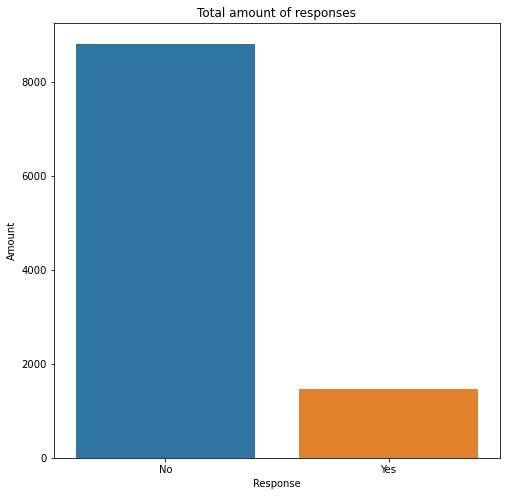

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.countplot(x='Response', data=new_customer_data)
ax.set_ylabel('Amount')
ax.set_title('Total amount of responses')
plt.show()

<font face="Verdana">**Total number of responses by sales channel**

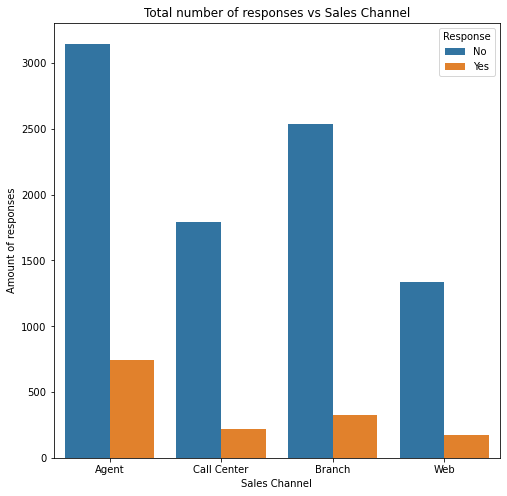

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.countplot(x='Sales Channel', hue='Response', data=new_customer_data)
ax.set_ylabel('Amount of responses')
ax.set_title('Total number of responses vs Sales Channel')
plt.show()

<font face="Verdana">**Response rate by sales channel**

In [41]:
response_yes = new_customer_data[['Sales Channel', 'Response']][new_customer_data['Response'] == 'Yes']\
    .groupby('Sales Channel').count()
response_yes

Response
Sales Channel          
Agent               742
Branch              326
Call Center         221
Web                 177

In [42]:
response_total = new_customer_data.groupby('Sales Channel').agg({'Response': 'size'})
response_total

Response
Sales Channel          
Agent              4121
Branch             3022
Call Center        2141
Web                1626

In [43]:
response_rate_channel = response_yes / response_total
response_rate_channel.reset_index(inplace=True)
response_rate_channel.rename(columns={'Response': 'Response Rate'}, inplace=True)
response_rate_channel

Sales Channel  Response Rate
0         Agent       0.180053
1        Branch       0.107876
2   Call Center       0.103223
3           Web       0.108856

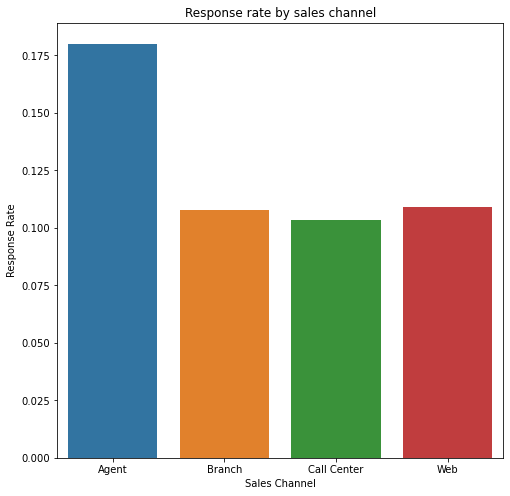

In [44]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(x='Sales Channel', y='Response Rate', data=response_rate_channel)
ax.set_title('Response rate by sales channel')
plt.show()

<font face="Verdana">**Total number of responses by total claim amount**

<font face="Verdana"> As there are too many values in the <font color='darkgreen'>Total Claim Amount</font> column, it makes sense to group the data before plotting them.

In [45]:
labels=['Low', 'Medium', 'High']
claim_amount_binned = pd.qcut(new_customer_data['Total Claim Amount'], q=3, labels=labels)
response_claim = pd.concat([new_customer_data['Response'], claim_amount_binned], axis=1)
response_claim

Response Total Claim Amount
0           No                Low
1           No               High
2           No             Medium
3          Yes             Medium
4           No               High
...        ...                ...
10905       No               High
10906       No                Low
10907       No             Medium
10908       No               High
10909      NaN               High

[10910 rows x 2 columns]

In [46]:
bins=['(0.098, 312.0]', '(312.0, 494.4]', '(494.4, 2893.24]']
pd.DataFrame({'bins': bins, 'labels': labels})     

bins  labels
0    (0.098, 312.0]     Low
1    (312.0, 494.4]  Medium
2  (494.4, 2893.24]    High

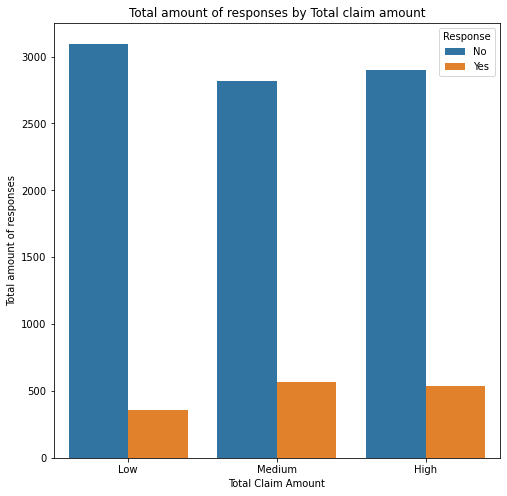

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.countplot(x='Total Claim Amount', hue='Response', data=response_claim)
ax.set_ylabel('Total amount of responses')
ax.set_title('Total amount of responses by Total claim amount')
plt.show()

<font face="Verdana">**Total number of responses by income**

<font face="Verdana">Like in the previous step, we should group the data in <font color='darkgreen'>Income</font> before plotting.

In [48]:
income_binned = pd.qcut(new_customer_data['Income'], q=3, labels=labels)
response_income = pd.concat([new_customer_data['Response'], income_binned], axis=1)
response_income

Response  Income
0           No  Medium
1           No     Low
2           No  Medium
3          Yes  Medium
4           No  Medium
...        ...     ...
10905       No     Low
10906       No    High
10907       No  Medium
10908       No    High
10909      NaN     Low

[10910 rows x 2 columns]

In [49]:
income_bins=['(-0.001, 21353.0]', '(21353.0, 52799.667]', '(52799.667, 99981.0]']
pd.DataFrame({'bins': income_bins, 'labels': labels})

bins  labels
0     (-0.001, 21353.0]     Low
1  (21353.0, 52799.667]  Medium
2  (52799.667, 99981.0]    High

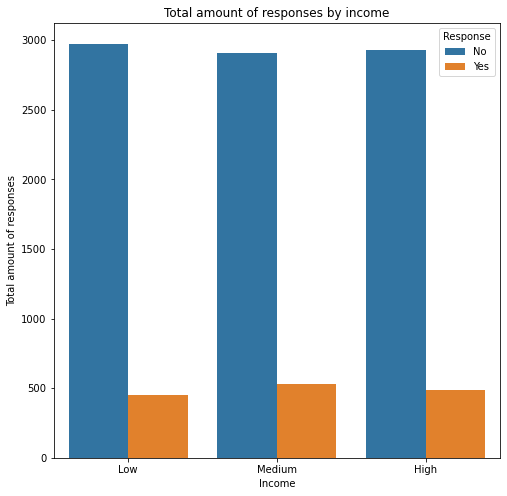

In [50]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.countplot(x='Income', hue='Response', data=response_income)
ax.set_ylabel('Total amount of responses')
ax.set_title('Total amount of responses by income')
plt.show()

<font face="Verdana">**Categorical vs numerical**

<font face="Verdana">Let's split the data into numerical and categorical columns to proceed with the analysis.

In [51]:
categoricals = new_customer_data.select_dtypes(include='object')
categoricals

State Response  Coverage Education Effective To Date  \
0         Arizona       No     Basic   College           2/18/11   
1      California       No     Basic   College           1/18/11   
2      Washington       No     Basic  Bachelor           2/10/11   
3          Oregon      Yes  Extended   College           1/11/11   
4          Oregon       No   Premium  Bachelor           1/17/11   
...           ...      ...       ...       ...               ...   
10905      Nevada       No   Premium  Bachelor           1/19/11   
10906      Oregon       No     Basic   College            1/6/11   
10907     Arizona       No  Extended  Bachelor            2/6/11   
10908  California       No   Premium   College           2/13/11   
10909         NaN      NaN     Basic  Bachelor            1/8/11   

      EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0             Employed      M      Suburban        Married  Corporate Auto   
1           Unemployed      F      Suburban         Single   Personal Auto   
2             Employed      M      Suburban         Single   Personal Auto   
3             Employed      M      Suburban         Single  Corporate Auto   
4        Medical Leave      F      Suburban        Married   Personal Auto   
...                ...    ...           ...            ...             ...   
10905       Unemployed      F      Suburban        Married   Personal Auto   
10906         Employed      F         Urban        Married   Personal Auto   
10907         Employed      F         Rural        Married  Corporate Auto   
10908         Employed      F         Urban       Divorced   Personal Auto   
10909       Unemployed      M      Suburban         Single   Personal Auto   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0      Corporate L3           Offer3         Agent  Four-Door Car      Medsize  
1       Personal L3           Offer4   Call Center  Four-Door Car      Medsize  
2       Personal L3           Offer3   Call Center            SUV      Medsize  
3      Corporate L3           Offer2        Branch  Four-Door Car      Medsize  
4       Personal L2           Offer1        Branch  Four-Door Car      Medsize  
...             ...              ...           ...            ...          ...  
10905   Personal L1           Offer3           Web     Luxury Car      Medsize  
10906   Personal L3           Offer2        Branch  Four-Door Car      Medsize  
10907  Corporate L3           Offer1           Web     Luxury SUV      Medsize  
10908   Personal L1           Offer1        Branch            SUV      Medsize  
10909   Personal L1           Offer4           Web            SUV      Medsize  

[10910 rows x 15 columns]

In [52]:
numericals = new_customer_data.select_dtypes(include='number')
numericals

Customer Lifetime Value  Income  Monthly Premium Auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       Months Since Last Claim  Months Since Policy Inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

<font face="Verdana">**Heatmap**

<font face="Verdana">Let's check the correlation between pairs of numerical variables.

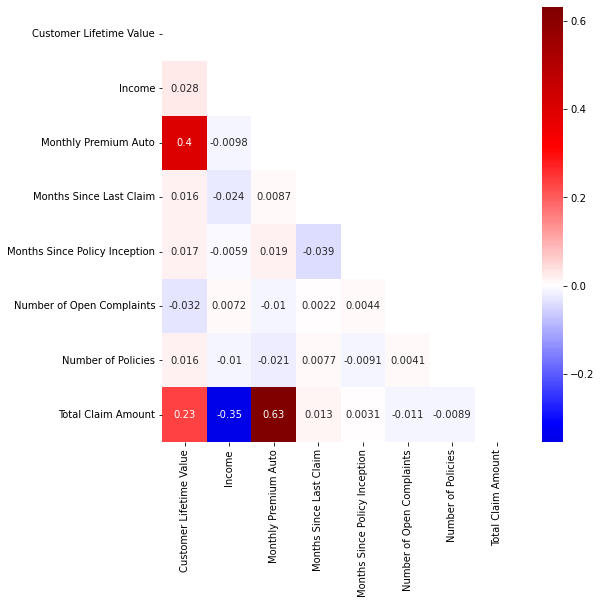

In [53]:
corr = numericals.corr() # returns a dataframe with the correlation values
matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)

fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.heatmap(
    numericals.corr(),  # the data for the heatmap
    annot=True,  # show the actual values of correlation
    cmap='seismic',  # provide the 'seismic' colormap
    center=0,  # specify the value at which to center the colormap
    fmt='.2g', # specify the format for the annotation 
    mask=matrix # hides the values where mask = True (= upper triangle)
           )
plt.show()

<font face="Verdana">None of the variables showed a high correlation. The best correlation is between <font color='darkgreen'>Total Claim Amount</font> and <font color='darkgreen'>Monthly Premium Auto</font> (0.63). Also, there are no signs of multicollinearity.

<font face="Verdana">**Checking for normality**

<font face="Verdana">We'll plot the distribution of the numeric variables to visually check for normallity.

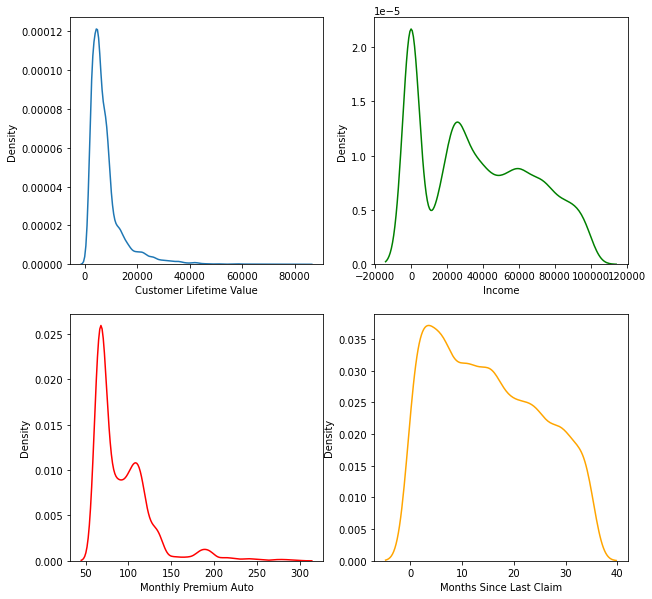

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.kdeplot(x='Customer Lifetime Value', data=numericals, ax=ax[0,0])
sns.kdeplot(x='Income', data=numericals, c='green', ax=ax[0,1])
sns.kdeplot(x='Monthly Premium Auto', data=numericals, c='red', ax=ax[1,0])
sns.kdeplot(x='Months Since Last Claim', data=numericals, c='orange', ax=ax[1,1])
plt.show()

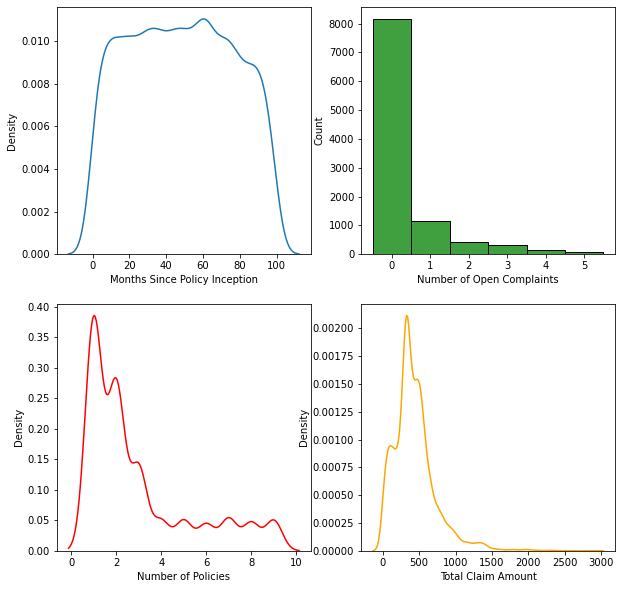

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.kdeplot(x='Months Since Policy Inception', data=numericals, ax=ax[0,0])
sns.histplot(x='Number of Open Complaints', data=numericals, color='green', discrete=True, ax=ax[0,1])
sns.kdeplot(x='Number of Policies', data=numericals, c='red', ax=ax[1,0])
sns.kdeplot(x='Total Claim Amount', data=numericals, c='orange', ax=ax[1,1])
plt.show()

<font face="Verdana">None of the variables follow a normal distribution.

## Activities

- [ ] X-y split.
- [ ] Normalize (numerical).
- [ ] One Hot/Label Encoding (categorical).

In [71]:
X = numericals.drop('Total Claim Amount', axis=1)
Y = numericals['Total Claim Amount']

In [74]:
categoricals_encoded = pd.get_dummies(categoricals, drop_first=True)
categoricals_encoded.shape

(10910, 101)

In [62]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(10910, 7)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=.20)